### 判斷要減掉幾個 sigma 小幫手
手動製作 region，  
會算出發射區內的 total flux 並畫成圖。

In [26]:
from casatasks import importfits, imstat
import matplotlib.pyplot as plt
import shutil

In [27]:
# 用了和 py_mom0_pipeline.ipynb 一樣的檔案系列
# 應該兩個寫在一起的，ㄜ有機會再做
parti_fileName = ['HCN-1-0', 'HCO+-1-0', 'CN-J12-12', 'HNC-1-0']
chansL = ['1999~2245', '3155~3360', '3230~3400', '2715~2850'] # 譜線區
NsigmaL = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
thisFile = '/Users/aqing/Documents/1004/Circinus_galaxy/Ratio-Map/mvp_smoothFirst/3_mom0_multi-sigma/' # 太長了不好看，設個

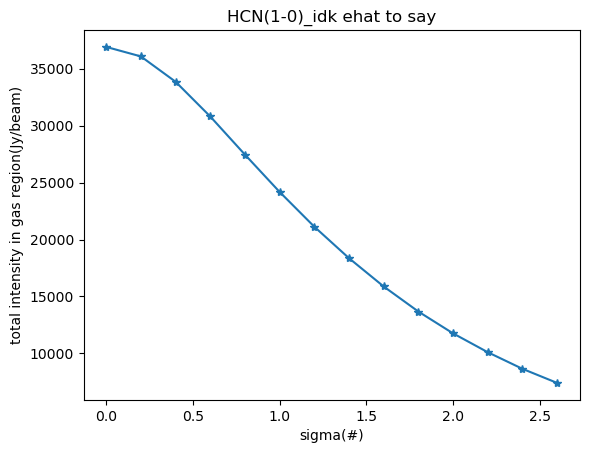

In [28]:
# HCN(1-0)
pixSum = [] # docs 說這和 flux(Jy) 好像不一樣
for i in NsigmaL:
        pathIN = f'{thisFile}HCN-1-0_mom0_smoothed-4545_sigma{i}.fits'
        importfits(fitsimage=pathIN, imagename='casaIN.im', overwrite=True)
        staa = imstat('casaIN.im')
        pixSum.append(staa['sum'])
        shutil.rmtree('casaIN.im')

plt.plot(NsigmaL, pixSum, marker='*')
plt.title('HCN(1-0)_idk ehat to say')
plt.xlabel('sigma(#)')
plt.ylabel('total intensity in gas region(Jy/beam)')
plt.show()

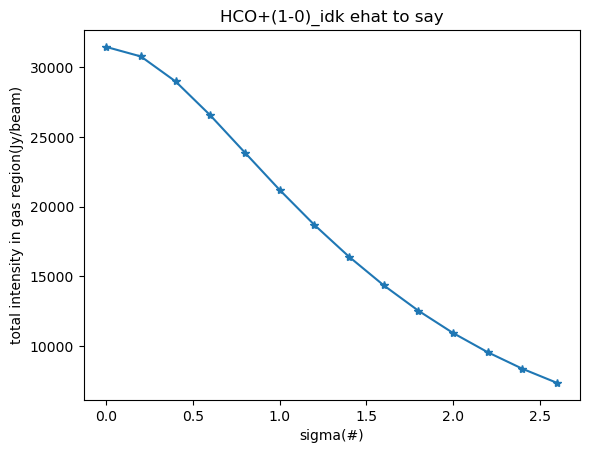

In [29]:
# HCO+(1-0)
pixSum = [] # docs 說這和 flux(Jy) 好像不一樣
for i in NsigmaL:
        pathIN = f'{thisFile}HCO+-1-0_mom0_smoothed-4545_sigma{i}.fits'
        importfits(fitsimage=pathIN, imagename='casaIN.im', overwrite=True)
        staa = imstat('casaIN.im')
        pixSum.append(staa['sum'])
        shutil.rmtree('casaIN.im')

plt.plot(NsigmaL, pixSum, marker='*')
plt.title('HCO+(1-0)_idk ehat to say')
plt.xlabel('sigma(#)')
plt.ylabel('total intensity in gas region(Jy/beam)')
plt.show()

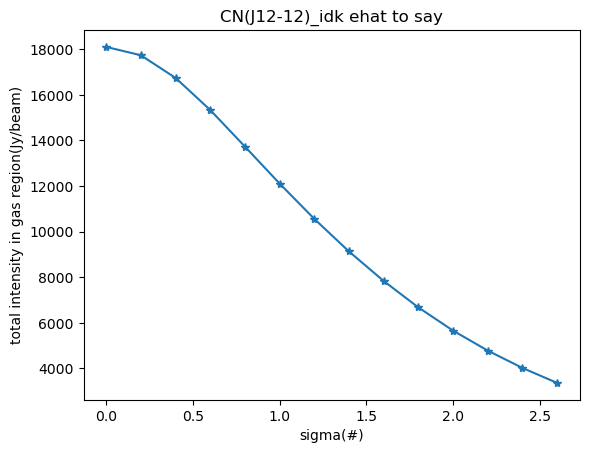

In [30]:
# CN+(1-0)
pixSum = [] # docs 說這和 flux(Jy) 好像不一樣
for i in NsigmaL:
        pathIN = f'{thisFile}CN-J12-12_mom0_smoothed-4545_sigma{i}.fits'
        importfits(fitsimage=pathIN, imagename='casaIN.im', overwrite=True)
        staa = imstat('casaIN.im')
        pixSum.append(staa['sum'])
        shutil.rmtree('casaIN.im')

plt.plot(NsigmaL, pixSum, marker='*')
plt.title('CN(J12-12)_idk ehat to say')
plt.xlabel('sigma(#)')
plt.ylabel('total intensity in gas region(Jy/beam)')
plt.show()

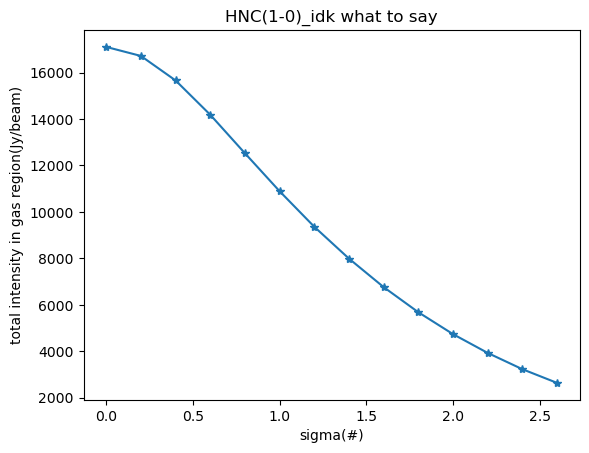

In [31]:
# HNC(1-0)
pixSum = [] # docs 說這和 flux(Jy) 好像不一樣
for i in NsigmaL:
        pathIN = f'{thisFile}HNC-1-0_mom0_smoothed-4545_sigma{i}.fits'
        importfits(fitsimage=pathIN, imagename='casaIN.im', overwrite=True)
        staa = imstat('casaIN.im')
        pixSum.append(staa['sum'])
        shutil.rmtree('casaIN.im')

plt.plot(NsigmaL, pixSum, marker='*')
plt.title('HNC(1-0)_idk what to say')
plt.xlabel('sigma(#)')
plt.ylabel('total intensity in gas region(Jy/beam)')
plt.show()